In [1]:
#Imports

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
date_parser = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d %H:%M:%S')
date_parser2 = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d')

In [3]:
pd.datetime.strptime?

In [113]:
air_reserve = pd.read_csv("air_reserve.csv",parse_dates=['visit_datetime','reserve_datetime'],date_parser=date_parser)
hpg_reserve = pd.read_csv("hpg_reserve.csv",parse_dates=['visit_datetime','reserve_datetime'],date_parser=date_parser)
air_store_info   = pd.read_csv("air_store_info.csv")
hpg_store_info   = pd.read_csv("hpg_store_info.csv")
store_id_relation= pd.read_csv("store_id_relation.csv")
air_visit_data   = pd.read_csv("air_visit_data.csv",parse_dates=['visit_date'],date_parser=date_parser2)
date_info        = pd.read_csv("date_info.csv",parse_dates=['calendar_date'],date_parser=date_parser2)
sample_submission=pd.read_csv("sample_submission.csv")

In [5]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [7]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [8]:
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [9]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [10]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [11]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [12]:
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


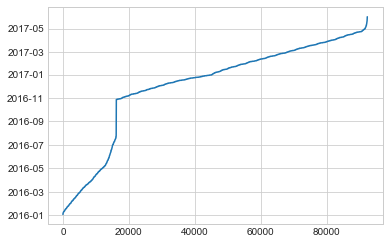

In [13]:
plt.plot(air_reserve['visit_datetime'])

In [14]:

air_visit_data.info()
len(air_visit_data['air_store_id'].unique())

#air store id    visit date  visitors
#there are 829 unique restraunts only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null datetime64[ns]
visitors        252108 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


829

In [15]:
air_reserve.info()
air_reserve.describe()
len(air_reserve['air_store_id'].unique())

#data about reservation followed by visit time and number of visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


314

In [16]:
hpg_reserve.info()
hpg_reserve.describe()
len(hpg_reserve['hpg_store_id'].unique())

#data about reservations followed by visits  and number of visitors 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
hpg_store_id        object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors    int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 61.0+ MB


13325

In [17]:
air_store_info.info()
air_store_info.describe()
len(air_store_info['air_genre_name'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


14

In [18]:
hpg_store_info.info()
len(hpg_store_info['hpg_genre_name'].value_counts())

#stores are significantly fewer than the reservation data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
hpg_store_id      4690 non-null object
hpg_genre_name    4690 non-null object
hpg_area_name     4690 non-null object
latitude          4690 non-null float64
longitude         4690 non-null float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


34

In [19]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
calendar_date    517 non-null datetime64[ns]
day_of_week      517 non-null object
holiday_flg      517 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.2+ KB


In [20]:
store_id_relation.info()

#only 149 entries. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
air_store_id    150 non-null object
hpg_store_id    150 non-null object
dtypes: object(2)
memory usage: 2.4+ KB


In [21]:
lb = LabelEncoder()
hpg_store_info['hpg_genre_name'] = lb.fit_transform(hpg_store_info['hpg_genre_name'].astype('str'))

In [22]:
air_store_info['air_genre_name'] =lb.fit_transform(air_store_info['air_genre_name'].astype('str'))
air_store_info['air_area_name']  =lb.fit_transform(air_store_info['air_area_name'].astype('str'))
hpg_store_info['hpg_area_name']  =lb.fit_transform(hpg_store_info['hpg_area_name'].astype('str'))

In [23]:
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [24]:
id_list = sample_submission['id']

In [25]:
id_list = id_list.apply(lambda s:s[:-11])

In [26]:
len(id_list)

32019

In [27]:
train_ids = air_visit_data['air_store_id'].unique()

In [28]:
id_not =[]
for ids in id_list:
    if ids not in train_ids:
        id_not.append(ids)

In [29]:
len(id_not)

0

In [30]:
visit_grouped = air_visit_data.groupby('visit_date')

In [31]:
sum_group = visit_grouped.aggregate?

In [ ]:
sum_group = visit_grouped.aggregate

In [32]:
sum_group = visit_grouped.aggregate

In [33]:
sum_group = visit_grouped.aggregate

In [34]:
sum_group = visit_grouped.aggregate

In [35]:
sum_group = visit_grouped.aggregate('sum')

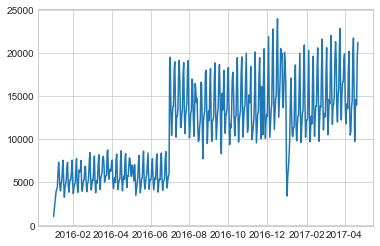

In [36]:
plt.plot(sum_group)

In [37]:
air_visit_air_store = pd.merge?

In [ ]:
air_visit_air_store = pd.merge

In [38]:
air_visit_air_store = pd.merge

In [39]:
air_visit_air_store = pd.merge

In [40]:
air_visit_air_store = pd.merge

In [41]:
air_visit_air_store = pd.merge?

In [ ]:
air_visit_air_store = pd.merge

In [42]:
air_visit_air_store = pd.merge

In [43]:
air_visit_air_store = pd.merge

In [44]:
air_visit_air_store = pd.merge

In [45]:
air_visit_air_store = pd.merge(air_visit_data,air_store_info,how="left",left_on="air_store_id",right_on="air_store_id")

In [46]:
print(air_visit_air_store.shape)
print(air_visit_data.shape)

(252108, 7)
(252108, 3)


In [47]:
air_visit_air_store = pd.merge(air_visit_air_store,date_info,how="left",left_on="visit_date",right_on="calendar_date")

In [48]:
print(air_visit_air_store.shape)

(252108, 10)


In [49]:
area_grouped = air_visit_air_store.groupby("air_area_name")

In [50]:
area_grouped = (area_grouped['visitors'].aggregate('sum'))

<Container object of 103 artists>

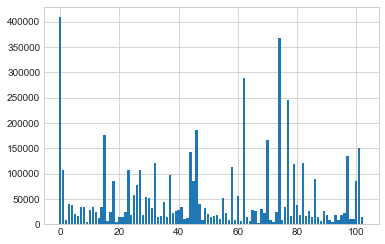

In [51]:
plt.bar(range(len(area_grouped)),area_grouped.values)

In [52]:
dates = air_visit_air_store['calendar_date']

In [53]:
air_visit_air_store['day_int'] = air_visit_air_store.apply(lambda row: row['calendar_date'].day,axis=1)

In [54]:
air_visit_air_store['year'] = air_visit_air_store.apply(lambda row: row['calendar_date'].year,axis=1)

In [55]:
air_visit_air_store.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,calendar_date,day_of_week,holiday_flg,day_int,year
0,air_ba937bf13d40fb24,2016-01-13,25,4,62,35.658068,139.751599,2016-01-13,Wednesday,0,13,2016
1,air_ba937bf13d40fb24,2016-01-14,32,4,62,35.658068,139.751599,2016-01-14,Thursday,0,14,2016
2,air_ba937bf13d40fb24,2016-01-15,29,4,62,35.658068,139.751599,2016-01-15,Friday,0,15,2016
3,air_ba937bf13d40fb24,2016-01-16,22,4,62,35.658068,139.751599,2016-01-16,Saturday,0,16,2016
4,air_ba937bf13d40fb24,2016-01-18,6,4,62,35.658068,139.751599,2016-01-18,Monday,0,18,2016


In [56]:
date1 = [date.month for date in dates]

In [57]:
air_visit_air_store['month'] = date1

In [58]:
air_visit_air_store['day_of_week'] = lb.fit_transform(air_visit_air_store['day_of_week'].astype('str'))

In [59]:
features = ['air_genre_name','air_area_name','day_of_week','holiday_flg','month','day_int','year']
target = 'visitors'


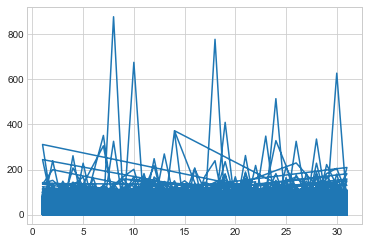

In [60]:
train_data = air_visit_air_store

train_data[features]


In [77]:
tmp = train_data.groupby(['air_store_id','day_of_week']).agg({'visitors' : [np.min,np.mean,np.median,np.max,np.size]}).reset_index()

In [78]:
tmp.columns = ['air_store_id', 'day_of_week', 'min_visitors', 'mean_visitors', 'median_visitors','max_visitors','count_observations']
train_data = pd.merge(train_data, tmp, how='left', on=['air_store_id','day_of_week'])

In [83]:
train_data[features]

,air_genre_name,air_area_name,day_of_week,holiday_flg,month,day_int,year,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations
0,4,62,6,0,1,13,2016,7,23.843750,25.0,57,64
1,4,62,4,0,1,14,2016,2,20.292308,21.0,54,65
2,4,62,0,0,1,15,2016,4,34.738462,35.0,61,65
3,4,62,2,0,1,16,2016,6,27.651515,27.0,53,66
4,4,62,1,0,1,18,2016,2,13.754386,12.0,34,57
5,4,62,5,0,1,19,2016,5,18.580645,19.0,35,62
6,4,62,6,0,1,20,2016,7,23.843750,25.0,57,64
7,4,62,4,0,1,21,2016,2,20.292308,21.0,54,65
8,4,62,0,0,1,22,2016,4,34.738462,35.0,61,65
9,4,62,2,0,1,23,2016,6,27.651515,27.0,53,66


In [82]:
features = ['air_genre_name','air_area_name','day_of_week','holiday_flg','month','day_int','year','min_visitors','mean_visitors','median_visitors','max_visitors','count_observations']

In [167]:
def modelfit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,(dtrain[target].values))
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
#     dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Print model report:
   
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')
    return alg

In [62]:
#xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=10,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=10,scale_pos_weight=1,seed=27)
#xgbFit = modelfit(xgb1,train_data,features,target)
#predictions = xgbFit.predict(test_data[features])

In [84]:
xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=78,max_depth=10,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=10,scale_pos_weight=1,seed=27)
xgbFit = modelfit(xgb1,train_data,features,target,useTrainCV=False)

KeyboardInterrupt: 

In [63]:
ids = sample_submission['id']
id_list = ids.apply(lambda s:s[:-11])
date_list = ids.apply(lambda s:s[21:31])


In [64]:
test_data = sample_submission[['id']]

In [65]:
genre_dict = {}
area_dict = {}
latitude_dict = {}
longitude_dict = {}

for uni_id in id_list.unique():
    genre_dict[uni_id] = air_visit_air_store[air_visit_air_store['air_store_id'] == uni_id]['air_genre_name'].iloc[0]
    area_dict[uni_id] = air_visit_air_store[air_visit_air_store['air_store_id'] == uni_id]['air_area_name'].iloc[0]
    latitude_dict[uni_id] = air_visit_air_store[air_visit_air_store['air_store_id'] == uni_id]['latitude'].iloc[0]
    longitude_dict[uni_id] = air_visit_air_store[air_visit_air_store['air_store_id'] == uni_id]['longitude'].iloc[0]
    

In [66]:
test_data['id'] = id_list
test_data['visit_date'] = date_list.apply(date_parser2)
test_data['air_genre_name'] = test_data.apply (lambda row: genre_dict.get(row['id']),axis=1)
test_data['air_area_name'] = test_data.apply (lambda row: area_dict.get(row['id']),axis=1)
test_data['latitude'] = test_data.apply (lambda row: latitude_dict.get(row['id']),axis=1)
test_data['longitude'] = test_data.apply (lambda row: longitude_dict.get(row['id']),axis=1)


C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
lb = LabelEncoder()

In [68]:
test_data = pd.merge(test_data,date_info,how='left',left_on='visit_date',right_on='calendar_date')

In [69]:
test_data['month'] = test_data.apply(lambda row: row['calendar_date'].month,axis=1)

In [70]:
test_data['day_int'] = test_data.apply(lambda row: row['calendar_date'].day,axis =1)
test_data['year'] = test_data.apply(lambda row: row['calendar_date'].year,axis = 1)

In [71]:
test_data['day_of_week'] = lb.fit_transform(test_data['day_of_week'].astype('str'))

In [72]:
test_data[features].head()

,air_genre_name,air_area_name,day_of_week,holiday_flg,month,day_int,year
0,6,44,3,0,4,23,2017
1,6,44,1,0,4,24,2017
2,6,44,5,0,4,25,2017
3,6,44,6,0,4,26,2017
4,6,44,4,0,4,27,2017


In [73]:
train_data[features].head()

,air_genre_name,air_area_name,day_of_week,holiday_flg,month,day_int,year
0,4,62,6,0,1,13,2016
1,4,62,4,0,1,14,2016
2,4,62,0,0,1,15,2016
3,4,62,2,0,1,16,2016
4,4,62,1,0,1,18,2016


In [74]:
sample_submission=pd.read_csv("sample_submission.csv")

In [75]:
predictions = xgbFit.predict(test_data[features])

NameError: name 'xgbFit' is not defined

In [ ]:
sample_submission['visitors'] = predictions

In [ ]:
sample_submission.set_index('id',inplace=True)

In [ ]:
sample_submission.head()

In [ ]:
sample_submission.to_csv("hamse_na_ho_payega.csv")

In [114]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [115]:
weekend_holidays = date_info.apply(lambda x: (x.day_of_week == 'Sunday' or x.day_of_week == 'Saturday') and (x.holiday_flg == 1),axis = 1 )

In [116]:
date_info.loc[weekend_holidays,'holiday_flg'] = 0

In [117]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,0
2,2016-01-03,Sunday,0
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [118]:
date_info['weight'] = np.exp((date_info.index + 1)/(2*len(date_info)))

In [119]:
date_info.head(100)

,calendar_date,day_of_week,holiday_flg,weight
0,2016-01-01,Friday,1,1.000968
1,2016-01-02,Saturday,0,1.001936
2,2016-01-03,Sunday,0,1.002906
3,2016-01-04,Monday,0,1.003876
4,2016-01-05,Tuesday,0,1.004847
5,2016-01-06,Wednesday,0,1.005820
6,2016-01-07,Thursday,0,1.006793
7,2016-01-08,Friday,0,1.007767
8,2016-01-09,Saturday,0,1.008742
9,2016-01-10,Sunday,0,1.009718


In [120]:
visit_data = air_visit_data.merge(date_info,left_on='visit_date',right_on='calendar_date',how='left')

In [121]:
visit_data['visitors'] = visit_data['visitors'].map(pd.np.log1p)

In [122]:
visit_data.head()

,air_store_id,visit_date,visitors,calendar_date,day_of_week,holiday_flg,weight
0,air_ba937bf13d40fb24,2016-01-13,3.258097,2016-01-13,Wednesday,0,1.012652
1,air_ba937bf13d40fb24,2016-01-14,3.496508,2016-01-14,Thursday,0,1.013632
2,air_ba937bf13d40fb24,2016-01-15,3.401197,2016-01-15,Friday,0,1.014613
3,air_ba937bf13d40fb24,2016-01-16,3.135494,2016-01-16,Saturday,0,1.015594
4,air_ba937bf13d40fb24,2016-01-18,1.945910,2016-01-18,Monday,0,1.017561


In [123]:
wmean = lambda x:((x.weight*x.visitors).sum()/x.weight.sum())
visitors = visit_data.groupby(['air_store_id','day_of_week','holiday_flg']).apply(wmean).reset_index()
visitors.rename(columns= {0:'visitors'},inplace=True)


In [124]:
visitors.head()

,air_store_id,day_of_week,holiday_flg,visitors
0,air_00a91d42b08b08d9,Friday,0,3.593532
1,air_00a91d42b08b08d9,Monday,0,3.067497
2,air_00a91d42b08b08d9,Monday,1,3.091042
3,air_00a91d42b08b08d9,Saturday,0,2.511943
4,air_00a91d42b08b08d9,Sunday,0,1.098612


In [125]:
sample_submission['air_store_id'] = sample_submission.id.map(lambda x: '_'.join(x.split('_')[:-1]))

In [126]:
sample_submission['calendar_date'] = sample_submission.id.map(lambda x:x.split('_')[2]).map(date_parser2)

In [127]:
sample_submission.drop('visitors',axis=1,inplace=True)

In [128]:
sample_submission = sample_submission.merge(date_info,on= 'calendar_date',how = 'left')

In [129]:
sample_submission.head()

,id,air_store_id,calendar_date,day_of_week,holiday_flg,weight
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0,1.589230
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0,1.590768
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0,1.592307
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0,1.593847
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,Thursday,0,1.595390


In [130]:
sample_submission = sample_submission.merge(visitors,on = ['air_store_id','day_of_week','holiday_flg'],how='left')

In [131]:
sample_submission.head()

,id,air_store_id,calendar_date,day_of_week,holiday_flg,weight,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0,1.589230,1.098612
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0,1.590768,3.067497
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0,1.592307,3.147336
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0,1.593847,3.328296
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,Thursday,0,1.595390,3.406322


In [132]:
missings = sample_submission.visitors.isnull()

In [133]:
sample_submission.loc[missings,'visitors'] =  sample_submission[missings].merge(visitors[visitors['holiday_flg'] == 0],on =['air_store_id','day_of_week'],how = 'left')['visitors_y'].values

In [134]:
missings = sample_submission.visitors.isnull()
sample_submission.loc[missings,'visitors'] = sample_submission[missings].merge(visitors[['air_store_id','visitors']].groupby('air_store_id').mean().reset_index(),on = 'air_store_id',how='left')['visitors_y'].values

In [135]:
sample_submission.head()

,id,air_store_id,calendar_date,day_of_week,holiday_flg,weight,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0,1.589230,1.098612
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0,1.590768,3.067497
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0,1.592307,3.147336
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0,1.593847,3.328296
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,Thursday,0,1.595390,3.406322


In [136]:
sample_submission['visitors'] = sample_submission['visitors'].apply(pd.np.expm1)

In [137]:
sample_submission.head()

,id,air_store_id,calendar_date,day_of_week,holiday_flg,weight,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0,1.589230,2.000000
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0,1.590768,20.488041
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0,1.592307,22.273988
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0,1.593847,26.890772
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,Thursday,0,1.595390,29.154140


In [138]:
sample_submission[['id','visitors']].to_csv('hamse_na_ho_payega.csv',float_format = '%.4f',index = None)

In [140]:
train =  sample_submission

In [151]:
train['year'] = train.apply(lambda x: x['calendar_date'].year,axis=1)

In [153]:
train['month'] = train.apply(lambda x: x['calendar_date'].month,axis = 1)
train['days'] = train.apply(lambda  x: x['calendar_date'].day,axis = 1)

In [154]:
train.head()

,id,air_store_id,calendar_date,day_of_week,holiday_flg,weight,visitors,year,month,days
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,Sunday,0,1.589230,2.000000,2017,4,23
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,Monday,0,1.590768,20.488041,2017,4,24
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,Tuesday,0,1.592307,22.273988,2017,4,25
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,Wednesday,0,1.593847,26.890772,2017,4,26
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,Thursday,0,1.595390,29.154140,2017,4,27


In [156]:
train = train.merge(air_store_info,left_on='air_store_id',right_on='air_store_id',how='left')

In [161]:
lb = LabelEncoder()
train['day_of_week'] = lb.fit_transform(train['day_of_week'].astype('str'))

In [163]:
train['air_genre_name'] = lb.fit_transform(train['air_genre_name'].astype('str'))
train['air_area_name'] = lb.fit_transform(train['air_area_name'].astype('str'))

In [164]:
train.head()

,id,air_store_id,calendar_date,day_of_week,holiday_flg,weight,visitors,year,month,days,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,3,0,1.589230,2.000000,2017,4,23,6,44,35.694003,139.753595
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,1,0,1.590768,20.488041,2017,4,24,6,44,35.694003,139.753595
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,5,0,1.592307,22.273988,2017,4,25,6,44,35.694003,139.753595
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,6,0,1.593847,26.890772,2017,4,26,6,44,35.694003,139.753595
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,4,0,1.595390,29.154140,2017,4,27,6,44,35.694003,139.753595


In [171]:
features = ['day_of_week','holiday_flg','year','month','days','air_genre_name','air_area_name']
train[features].head()
target = 'visitors'

In [ ]:
xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=78,max_depth=10,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=10,scale_pos_weight=1,seed=27)
xgbFit = modelfit(xgb1,train,features,target,useTrainCV=False)